<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

#
<hr style="border-width:2px;border-color:red">
<center><h1>Solution</h1></center>

To effectively address the problem and provide a comprehensive response to the test, I suggest defining the objectives as follows. These objectives serve as reference points for the sections covered in the notebook:

## Expected tasks:

> * **`Obj 1`** : Train and validate two/three Machine Learning models on **period 0** data.
> * **`Obj 1 bis`** : Test Winner Model on **period 1, .. , 3** data.
> * **`Obj 2`** : Implement drift metrics for measuring model drift.
> * **`Obj 3`** : Analyze the model drift.
> * No need for exploratory data analysis.
> * No need for hyperparameter optimization, but it can be done if desired.
<hr style="border-width:2px;border-color:red">

### <p style="text-align:left"><span style="color:green">Importing Required `Libraries`</span></p>

In [1]:
# Data manipulation and analysis libraries:
import numpy as np
import pandas as pd

# Data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.graph_objs as go
import plotly.express as px

# Other libraries:
#from tqdm import tqdm
from dotenv import load_dotenv
import warnings
import os

# Data science imports:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
)


from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, median_absolute_error

# Configure pandas to display all columns:
pd.set_option('display.max_columns', None)

# Render figures directly in the notebook:
%matplotlib inline

# Render higher resolution images:
%config InlineBackend.figure_format = 'retina'

# Ignore warning messages:
warnings.filterwarnings('ignore')

### <p style="text-align:left"><span style="color:green">Reading the `CSV Files`</span></p>

In [2]:
# Load environment variables from .env file
load_dotenv()

# Set the path to the directory where csv data is stored
DATA_PATH = os.getenv("DATA_PATH")


# Listing the different datasets on our data directory
files = sorted(os.listdir(DATA_PATH))
for file in files:
    print(file)

period_0.csv
period_1.csv
period_2.csv
period_3.csv


In [3]:
# Reading the datasets
periods = [] # Here we will store the datsets
for file in files:
    file_path = os.path.join(DATA_PATH, file)
    period = pd.read_csv(file_path)
    periods.append(period)

## <p style="text-align:center"><span style="color:red">Training a model on `period_0 data` ( Obj 1 )</span></p>

In [4]:
quarter_0 = periods[0] # This the dataset that contains period_0 data
print(f'The "period_0" dataframe shape: {quarter_0.shape}')
quarter_0.head(5)

The "period_0" dataframe shape: (1000, 10)


,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


> * We have 100 records in total.
> * We have 9 Features, the target column is **`TotalCart`**

### <p style="text-align:left"><span style="color:green">Analysing the `Missingness`</span></p>
> Avant d'entrer plus dans, dans les details, on analyse la qualité de nos données ( missing elements, data types )

In [5]:
missing_count = quarter_0.isnull().sum()
missing_percentage = (missing_count / len(quarter_0)) * 100
missing_data = pd.DataFrame({'Missing Count': missing_count, 
                             'Missing Percentage': missing_percentage})

missing_data.sort_values('Missing Count', ascending=False).head(2)

,Missing Count,Missing Percentage
Age,0,0.0
Seniority,0,0.0


> No Missing data to handle !

### <p style="text-align:left"><span style="color:green">Satisticals `Analysis`</span></p>

In [6]:
quarter_0.describe() #shows count, mean, std etc. for each column

,Age,Seniority,Orders,Items,AverageDiscount,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.06900,0.508000,3.011000,5.975000,0.371700,97.949068,0.989000,1.012000,35.884260
std,5.05943,0.720038,1.731438,2.399194,0.219133,100.222845,1.002938,1.022204,17.619171
min,7.00000,0.000000,0.000000,1.000000,0.000000,0.012724,0.000000,0.000000,0.000000
25%,21.00000,0.000000,2.000000,4.000000,0.180000,29.333357,0.000000,0.000000,25.575000
50%,24.00000,0.000000,3.000000,6.000000,0.380000,68.037177,1.000000,1.000000,33.655000
75%,27.00000,1.000000,4.000000,7.000000,0.560000,127.063901,2.000000,2.000000,43.772500
max,41.00000,4.000000,9.000000,15.000000,0.750000,831.026761,5.000000,7.000000,138.880000


### <p style="text-align:left"><span style="color:green">Analysing `TotalCart` Distrubution</span></p>

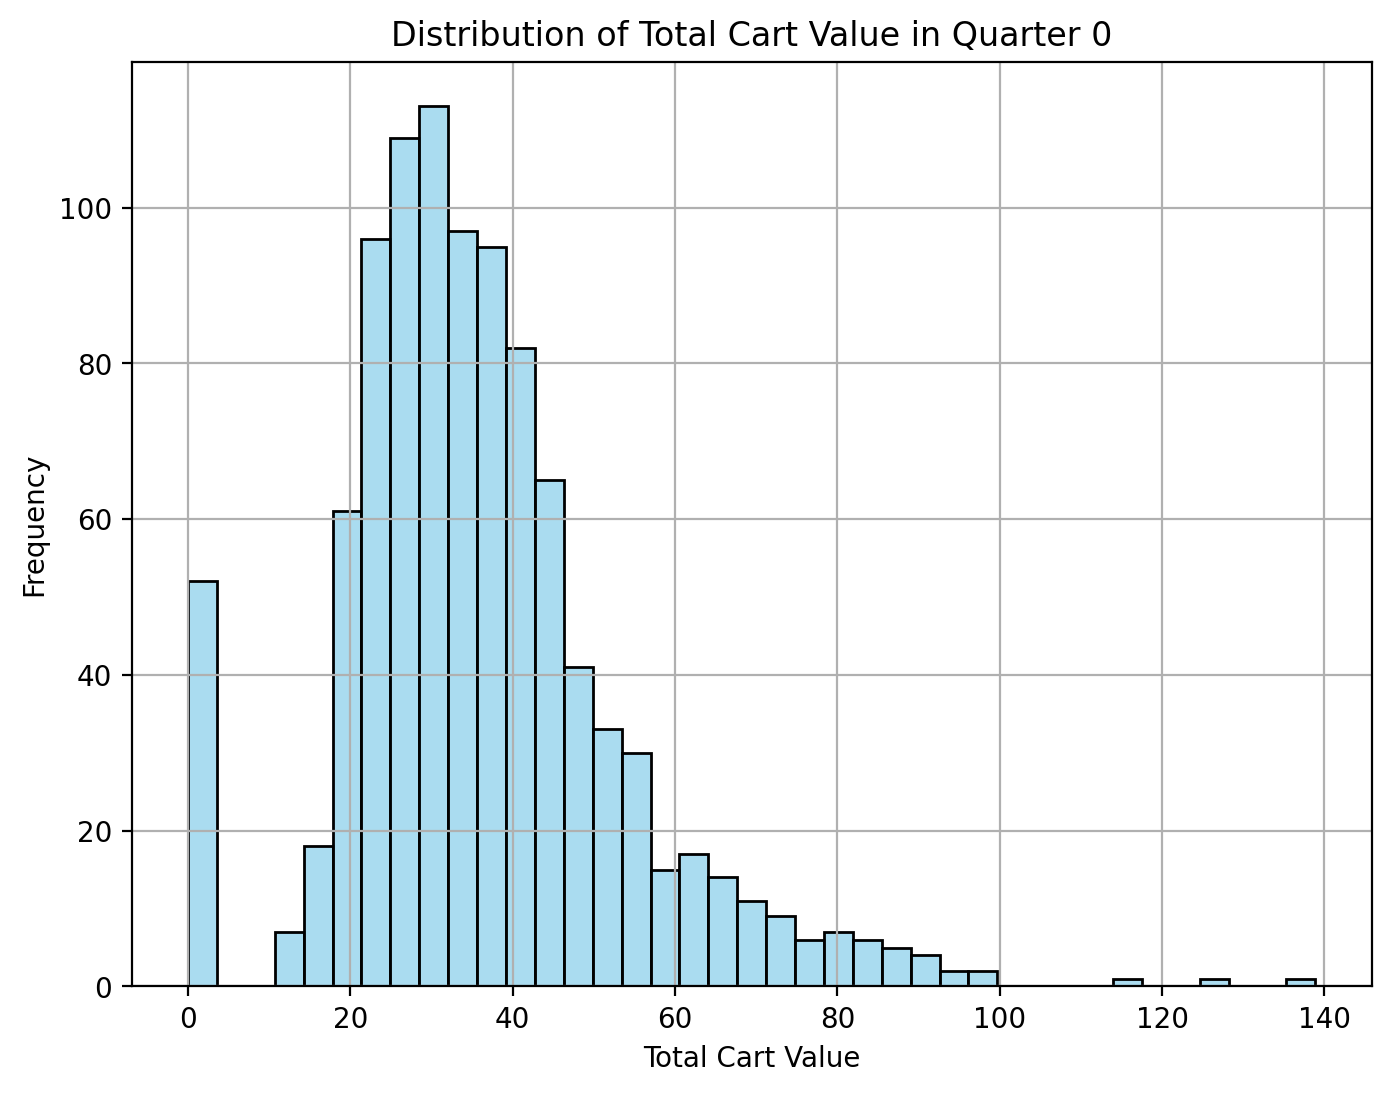

In [7]:
plt.figure(figsize=(8, 6))  
sns.histplot(data=quarter_0, x="TotalCart", color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Total Cart Value")
plt.ylabel("Frequency")
plt.title("Distribution of Total Cart Value in Quarter 0")
plt.grid(True)  
plt.show()

> Based on the **Distrubution plot**, it is evident that the **target variable follows a positive skew data distribution**. 

> As we **`focus on finding a good model for the period_0 data without extensive feature engineering`**, we'll skip the exploration of the best performing models.

> To address the positive skewness in the continuous target variable, I've researched some possible solutions. The following sources provide valuable insights on the matter:
> * [Regression: How to deal with positive skewness in continuous target variable](https://datascience.stackexchange.com/questions/65467/regression-how-to-deal-with-positive-skewness-in-continuous-target-variable)
> * [Top 3 Methods for Handling Skewed Data](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)
>> We can employ various techniques such as **`Logarithmic Transformation`**, **`Square Root Transformation`**, or **`Box-Cox Transformation`** to adjust the target variable's distribution. Additionally, it is worth considering **`model stacking`** and assessing **`feature independence`** as potential approaches.

### <p style="text-align:left"><span style="color:green">Feature `Engineering` ( Not Performed ) </span></p>

Although **feature engineering** can be performed on our data by creating new features, we have chosen not to do so because our objective is to visualize the effect of **data drift** rather than **optimize the model's performance**.

> * **`AverageTimePerOrder`**: The average time spent browsing per order. ( $AverageTimePerOrder = \frac{BrowsingTime}{Orders}$ )
> * **`AverageOrderValue`**: The average order value. ( $AverageOrderValue = \frac{TotalCart}{Orders}$ )

### <p style="text-align:left"><span style="color:green">Handling the `Categorical columns`</span></p>
> * Before **`training the model`**, it is necessary to handle the categorical features since models typically operate with numerical data. There are various approaches to address this issue, such as using **`OneHotEncoding`** or **`LabelEncoder`** to encode the categorical features.                                       
> * In this case, I have opted to use the **`LabelEncoder`** to encode the features.

In [8]:
# Checking the Categorical Features
quarter_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Seniority            1000 non-null   int64  
 2   Orders               1000 non-null   int64  
 3   Items                1000 non-null   int64  
 4   AverageDiscount      1000 non-null   float64
 5   TopCategory          1000 non-null   object 
 6   BrowsingTime         1000 non-null   float64
 7   EmailsOpened         1000 non-null   int64  
 8   SupportInteractions  1000 non-null   int64  
 9   TotalCart            1000 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 78.2+ KB


In [9]:
# Checking the Unique Elements of the 'TopCategory' Feature
quarter_0['TopCategory'].unique()

array(['Clothing,Shoes & Jewelry', 'Toys & Games',
       'Health, Household & Baby Care', 'Electronics', 'Home & Kitchen',
       'Pet Supplies', 'Beauty & Personal Care', 'Sports & outdoors',
       'Office Supplies'], dtype=object)

In [10]:
# Coverting the labels into a numeric form using Label Encoder
le = LabelEncoder()
for col in quarter_0.columns:
    if quarter_0[col].dtype=='object':
        quarter_0[col] = le.fit_transform(quarter_0[col])

In [11]:
quarter_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   int64  
 1   Seniority            1000 non-null   int64  
 2   Orders               1000 non-null   int64  
 3   Items                1000 non-null   int64  
 4   AverageDiscount      1000 non-null   float64
 5   TopCategory          1000 non-null   int64  
 6   BrowsingTime         1000 non-null   float64
 7   EmailsOpened         1000 non-null   int64  
 8   SupportInteractions  1000 non-null   int64  
 9   TotalCart            1000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [12]:
quarter_0['TopCategory'].unique()

array([1, 8, 3, 2, 4, 6, 0, 7, 5])

> As expected, the **`TopCategory`** was encodded

### <p style="text-align:left"><span style="color:green">Analysing the `Correlation`</span></p>

In [13]:
# To enhance the visualization of the confusion matrix, we can define a list to reorder the columns accordingly.
ordred_cols = ['Age', 'Seniority', 'Orders', 'Items', 'AverageDiscount',
               'TopCategory', 'BrowsingTime', 'EmailsOpened', 'SupportInteractions', 'TotalCart'] 

quarter_0 = quarter_0[ordred_cols]

<Axes: >

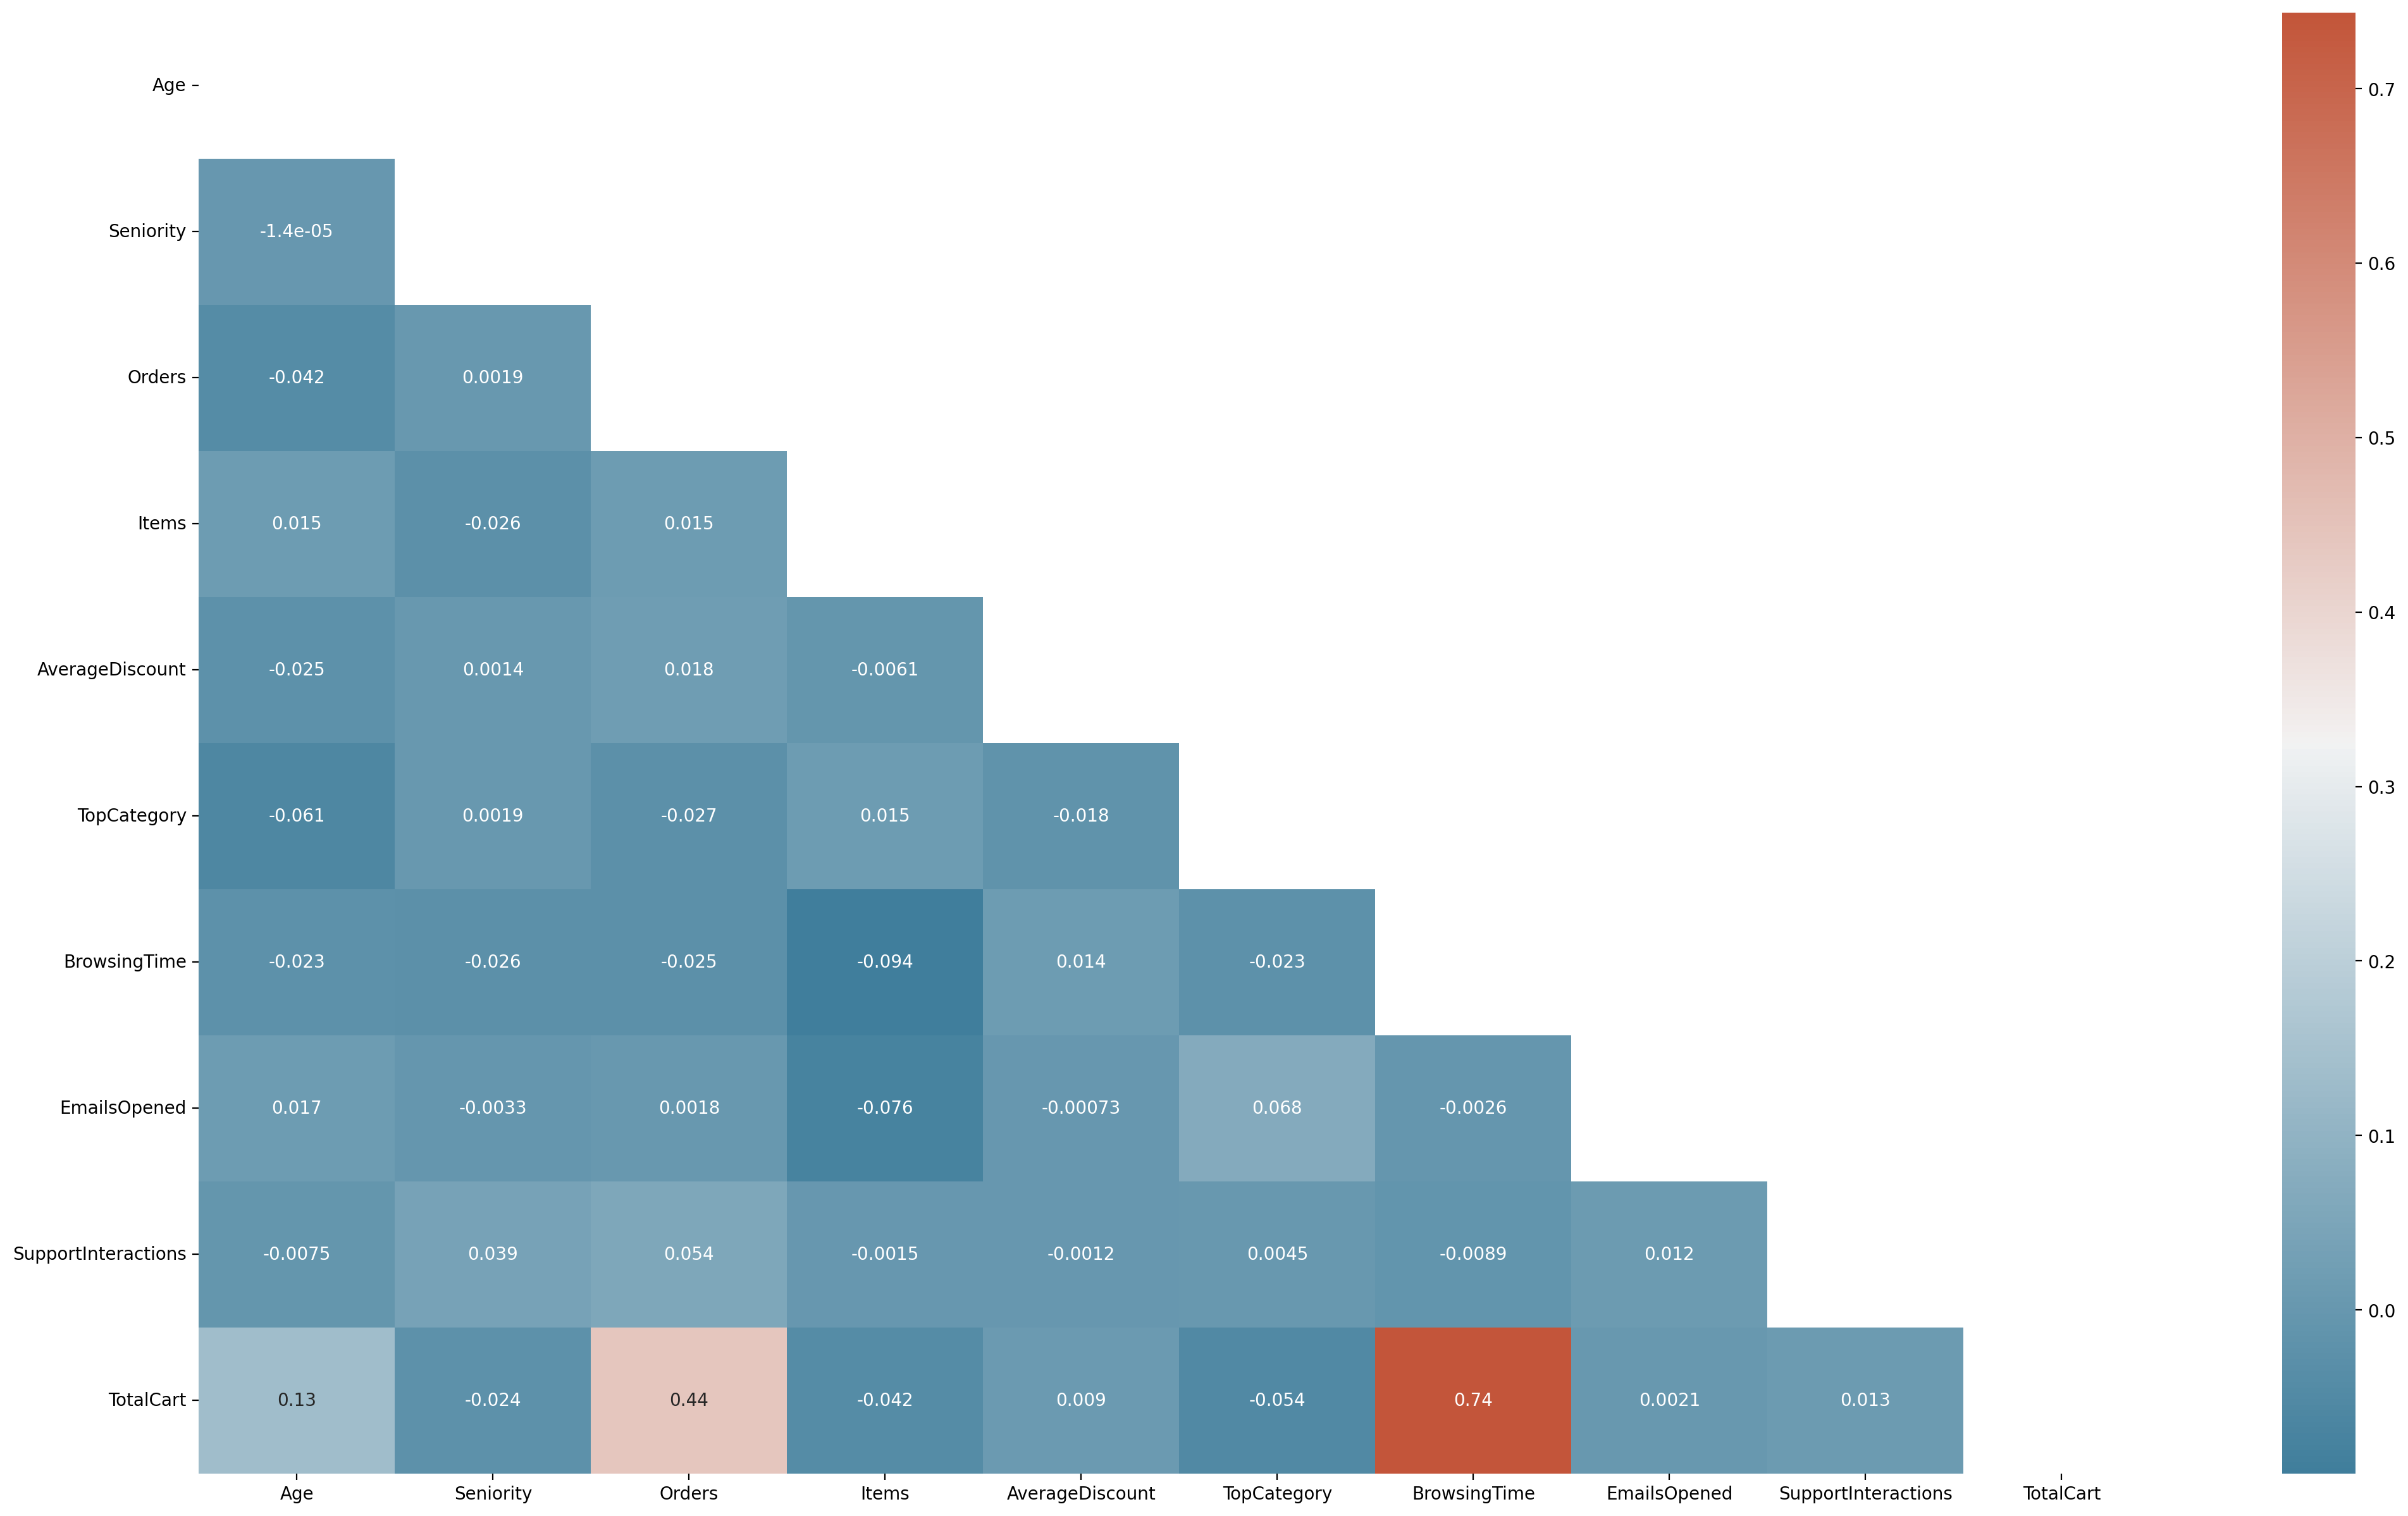

In [14]:
plt.figure(figsize=(25, 15))
corr = quarter_0.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)

In [15]:
# Defining the target variable
target = 'TotalCart'

# Defining the Correlation Threshold
correlation_threshold = 0.4

# Selecting the Highly Correlated Features 
highly_correlated_features = corr[corr[target] >= correlation_threshold].index.to_list()
highly_correlated_features.remove(target)

# Diplaying the selected Features
print(f'The highly correlated variables with the "{target}" varible are: {highly_correlated_features}')

The highly correlated variables with the "TotalCart" varible are: ['Orders', 'BrowsingTime']


### <p style="text-align:left"><span style="color:green">General `Insights`</span></p>
Here are the key insights we have gathered so far about our regression ML problem:

> * The dataset consists of 1000 rows and includes 8 numerical features and 1 categorical feature that has been label encoded for numerical representation.
> * The target variable exhibits a right-skewed distribution with an outlier located at the beginning.
> * Two features in the dataset demonstrate a strong correlation with the target variable.
> * Importantly, the two highly correlated variables are not collinear, indicating they provide distinct information to the regression problem.

### <p style="text-align:left"><span style="color:green">Model `Training`</span></p>

> Here's how I propose to approach this section:  
>* First, I will test multiple models and select the **top three performing ones**. 
>* Next, I will subject them to **`K-Fold Cross Validation`** to ensure that the models are functioning properly and that the performance metrics are not biased by the choice of split.

#### <p style="text-align:left"><span style="color:blue">Testing `Multiple Regression models`</span></p>

In [16]:
# storing the Dependent Variables in X and Independent Variable in Y
target = 'TotalCart'
features = highly_correlated_features
test_size = 0.15

x = quarter_0.drop(target, axis=1)
y = quarter_0[target]

# Splitting the Data into Training set and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Display shape information for training and test datasets
print(f"Training data:\nX shape: {x_train.shape}\nY shape: {y_train.shape}\n")
print(f"Test data:\nX shape: {x_test.shape}\nY shape: {y_test.shape}\n")


# Define models
models = [
    LinearRegression(), DecisionTreeRegressor(), BaggingRegressor(), RandomForestRegressor(),
    SVR(), KNeighborsRegressor(n_neighbors=5), Ridge(), Lasso(alpha=0.1),
    GradientBoostingRegressor(), ExtraTreesRegressor()
]

# Define evaluation metrics
evaluation_metrics = [
    lambda y_true, y_pred: np.sqrt(metrics.mean_squared_error(y_true, y_pred)),
    metrics.mean_squared_error, metrics.mean_absolute_error, metrics.r2_score,
    metrics.mean_absolute_percentage_error, metrics.median_absolute_error
]

# Define a function to evaluate each model
def evaluate_model(model, x_test, y_test, evaluation_metrics):
    y_pred = model.predict(x_test)
    scores = {}
    for metric in evaluation_metrics:
        name = metric.__name__
        score = metric(y_test, y_pred)
        scores[name] = score
    return scores

Training data:
X shape: (850, 9)
Y shape: (850,)

Test data:
X shape: (150, 9)
Y shape: (150,)



#### <p style="text-align:left"><span style="color:blue">`Running` & `Evaluating` the Models</span></p>

In [17]:
# Evaluate models and store results in a DataFrame
results = []
for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    print(f"✅ for the model '{model_name}'")
    scores = evaluate_model(model, x_test, y_test, evaluation_metrics)
    results.append({'Model Name': model_name, **scores})
results_df = pd.DataFrame(results)

# Rename the <lambda> column to RMSE
results_df = results_df.rename(columns={"<lambda>": "root_mean_squared_error"})


winners = results_df.sort_values("root_mean_squared_error", ascending=True)
winner_name = f'{winners.iloc[0,0]}'
winner_RMSE = f'{winners.iloc[0,1]:.2f}'
winner_MSE = f'{winners.iloc[0,2]:.2f}'
winner_MAE = f'{winners.iloc[0,3]:.2f}'
winner_R2 = f'{winners.iloc[0,4]:.2f}'
winners

✅ for the model 'LinearRegression'
✅ for the model 'DecisionTreeRegressor'
✅ for the model 'BaggingRegressor'
✅ for the model 'RandomForestRegressor'
✅ for the model 'SVR'
✅ for the model 'KNeighborsRegressor'
✅ for the model 'Ridge'
✅ for the model 'Lasso'
✅ for the model 'GradientBoostingRegressor'
✅ for the model 'ExtraTreesRegressor'


,Model Name,root_mean_squared_error,mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error,median_absolute_error
8,GradientBoostingRegressor,1.557325,2.425261,1.142767,0.989237,4.252802e+13,0.961127
9,ExtraTreesRegressor,1.709131,2.921128,1.186802,0.987037,3.265783e-02,0.811650
3,RandomForestRegressor,2.059608,4.241985,1.509009,0.981175,4.273280e-02,1.109700
2,BaggingRegressor,2.533441,6.418325,1.876647,0.971517,5.185570e-02,1.437000
1,DecisionTreeRegressor,2.872097,8.248939,2.198067,0.963394,6.181039e-02,1.720000
7,Lasso,4.245548,18.024679,3.458450,0.920012,3.719581e+14,3.036191
6,Ridge,4.280154,18.319722,3.483090,0.918703,3.754627e+14,3.042220
0,LinearRegression,4.282338,18.338423,3.485188,0.918620,3.753637e+14,3.041373
5,KNeighborsRegressor,5.855950,34.292153,4.263387,0.847822,6.366288e+14,3.092000
4,SVR,6.915144,47.819216,5.439441,0.787793,8.307716e+14,4.426066


> For **better readability**, since I'm not using a framework like **[MLflow](https://mlflow.org/)** to assist us in **storing** the results of our experiments and **comparing the performance** of different models, I used for **`simple pandas dataframe`**.

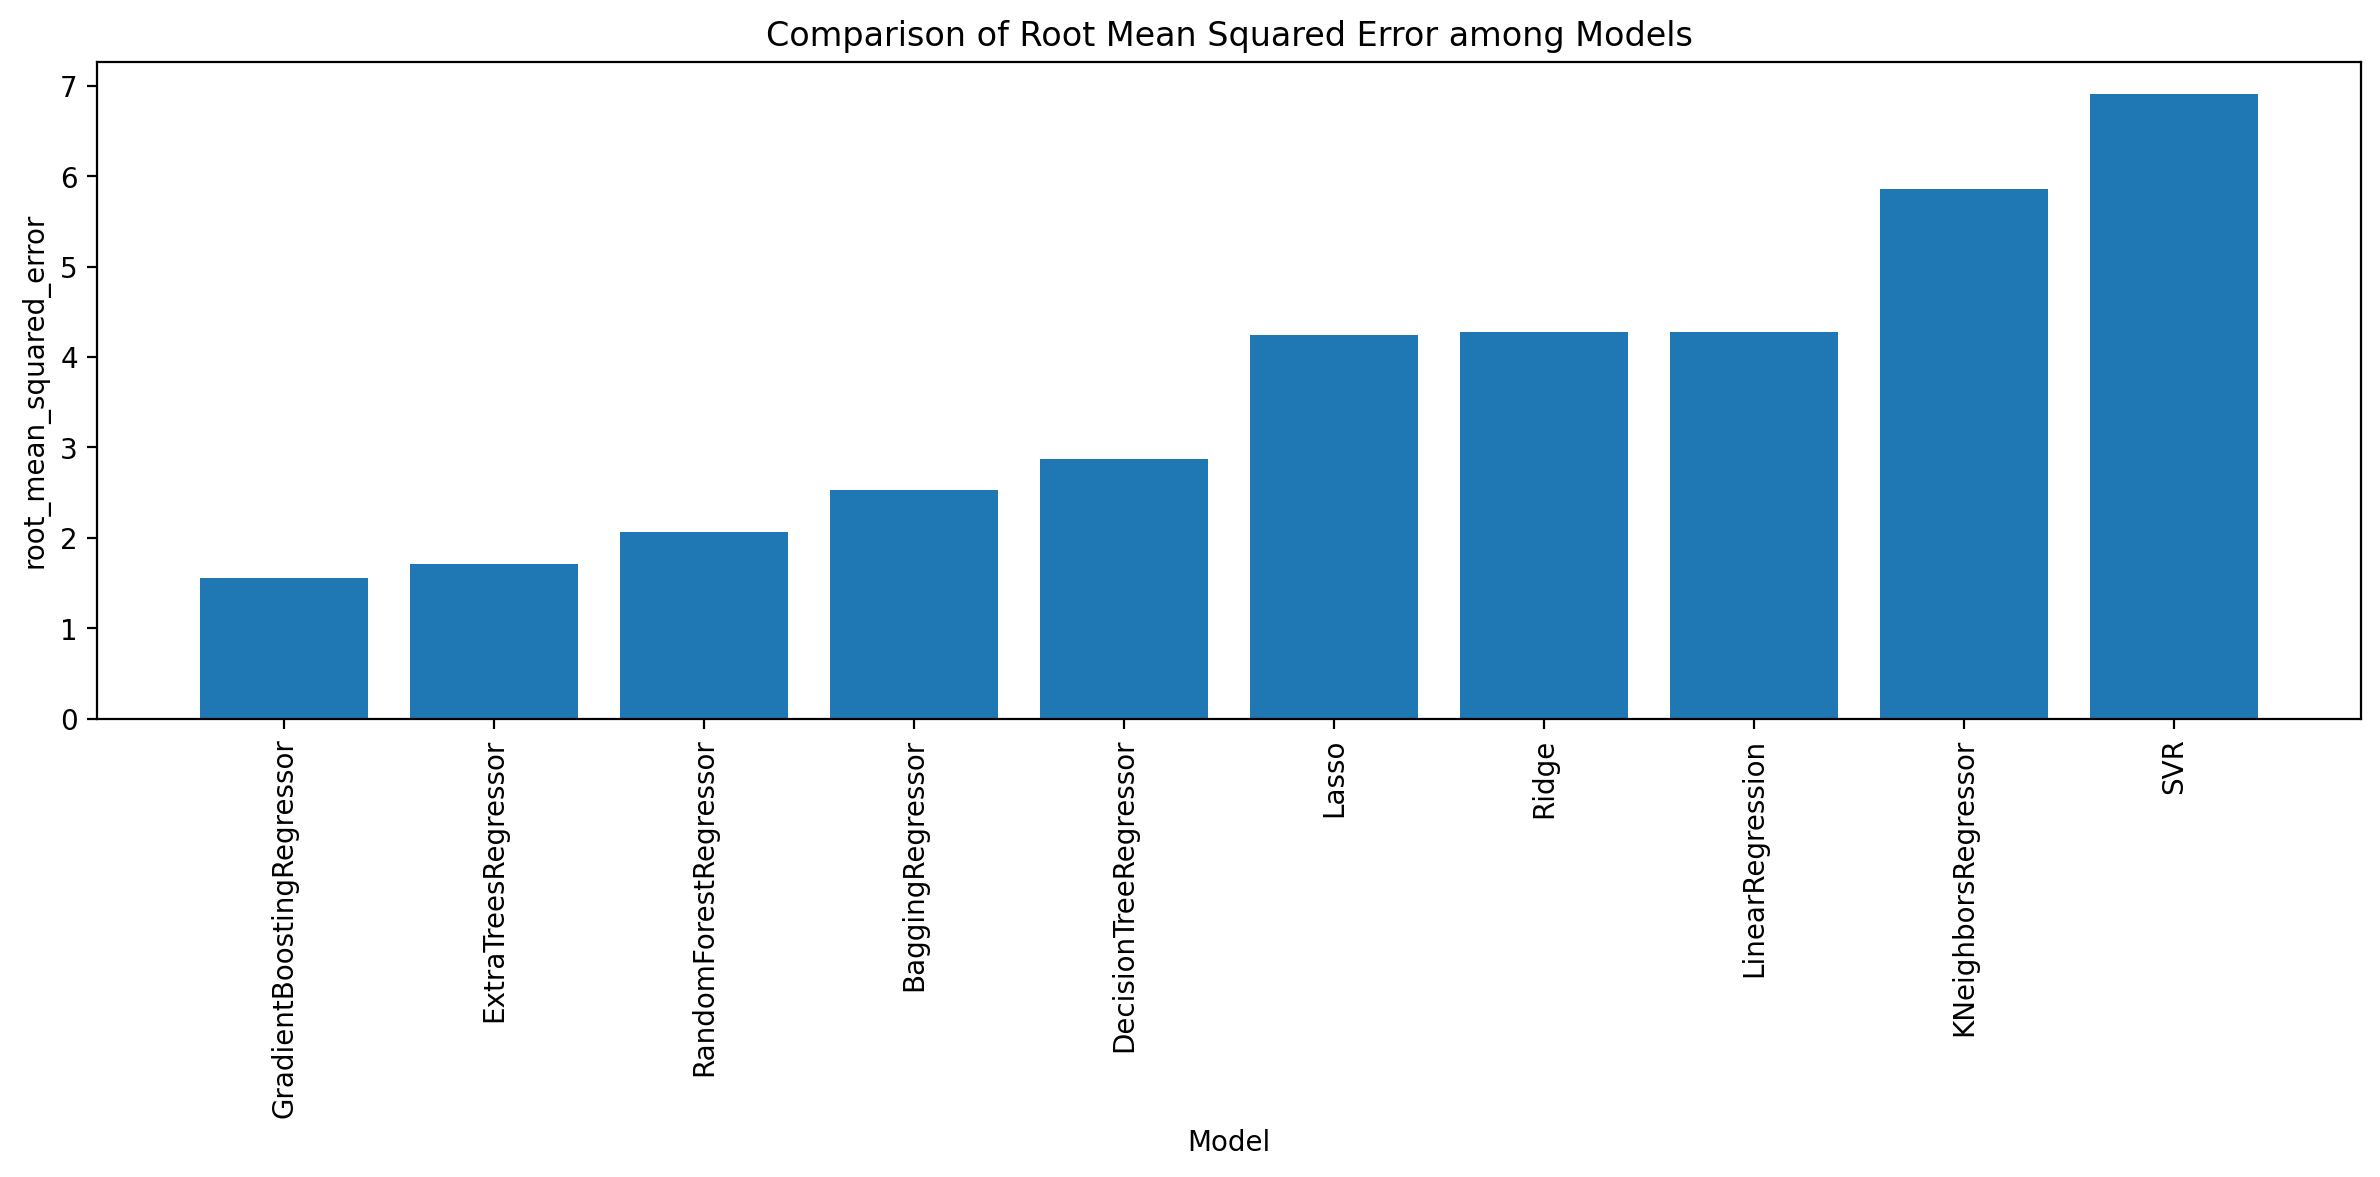

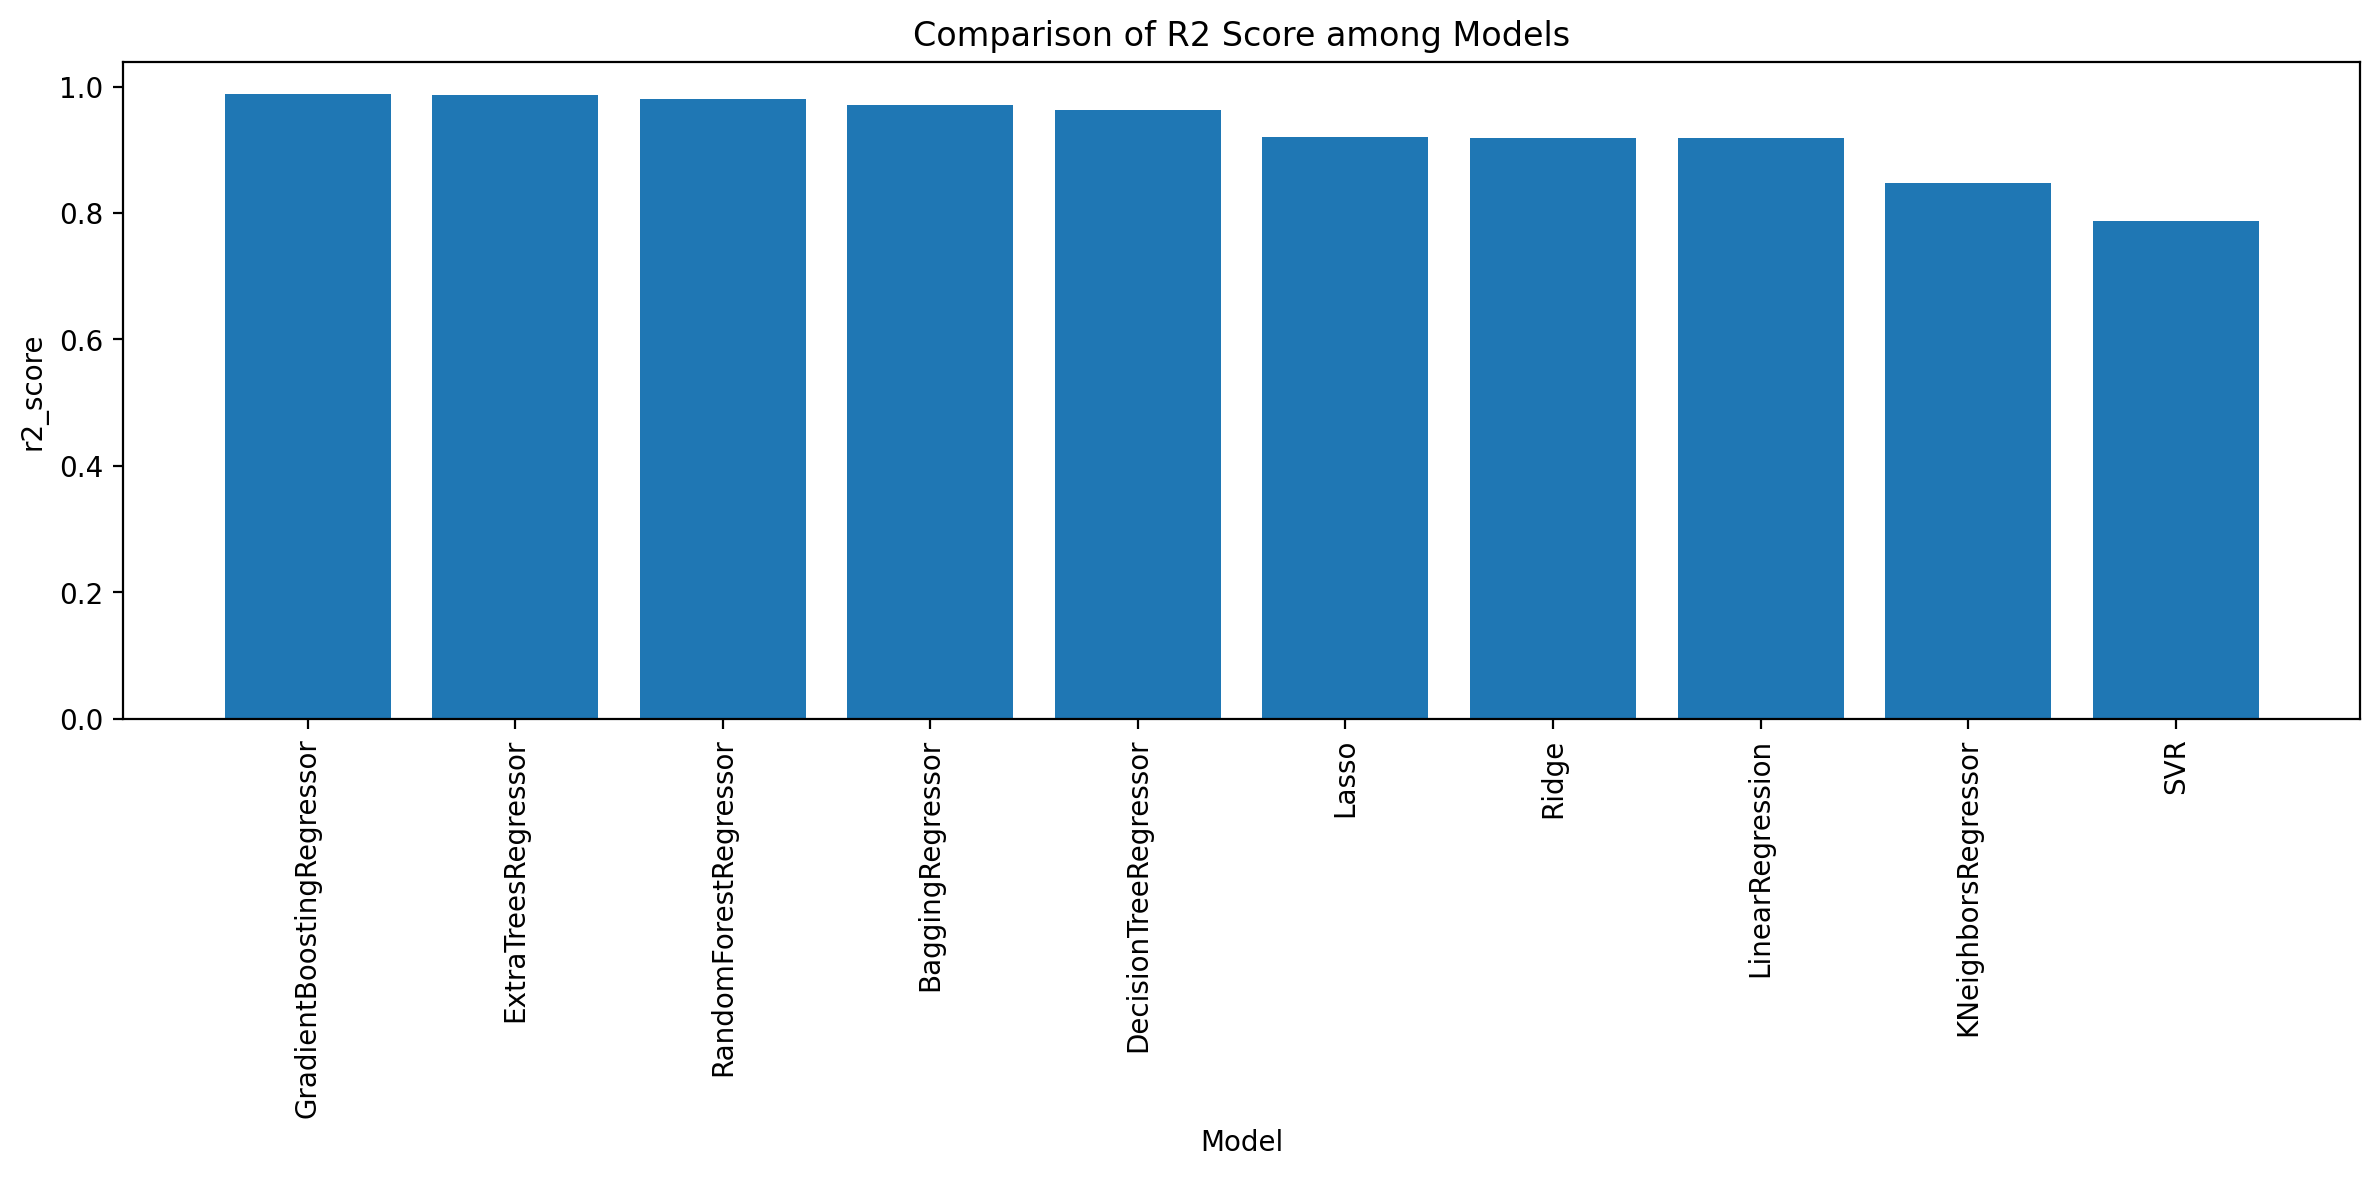

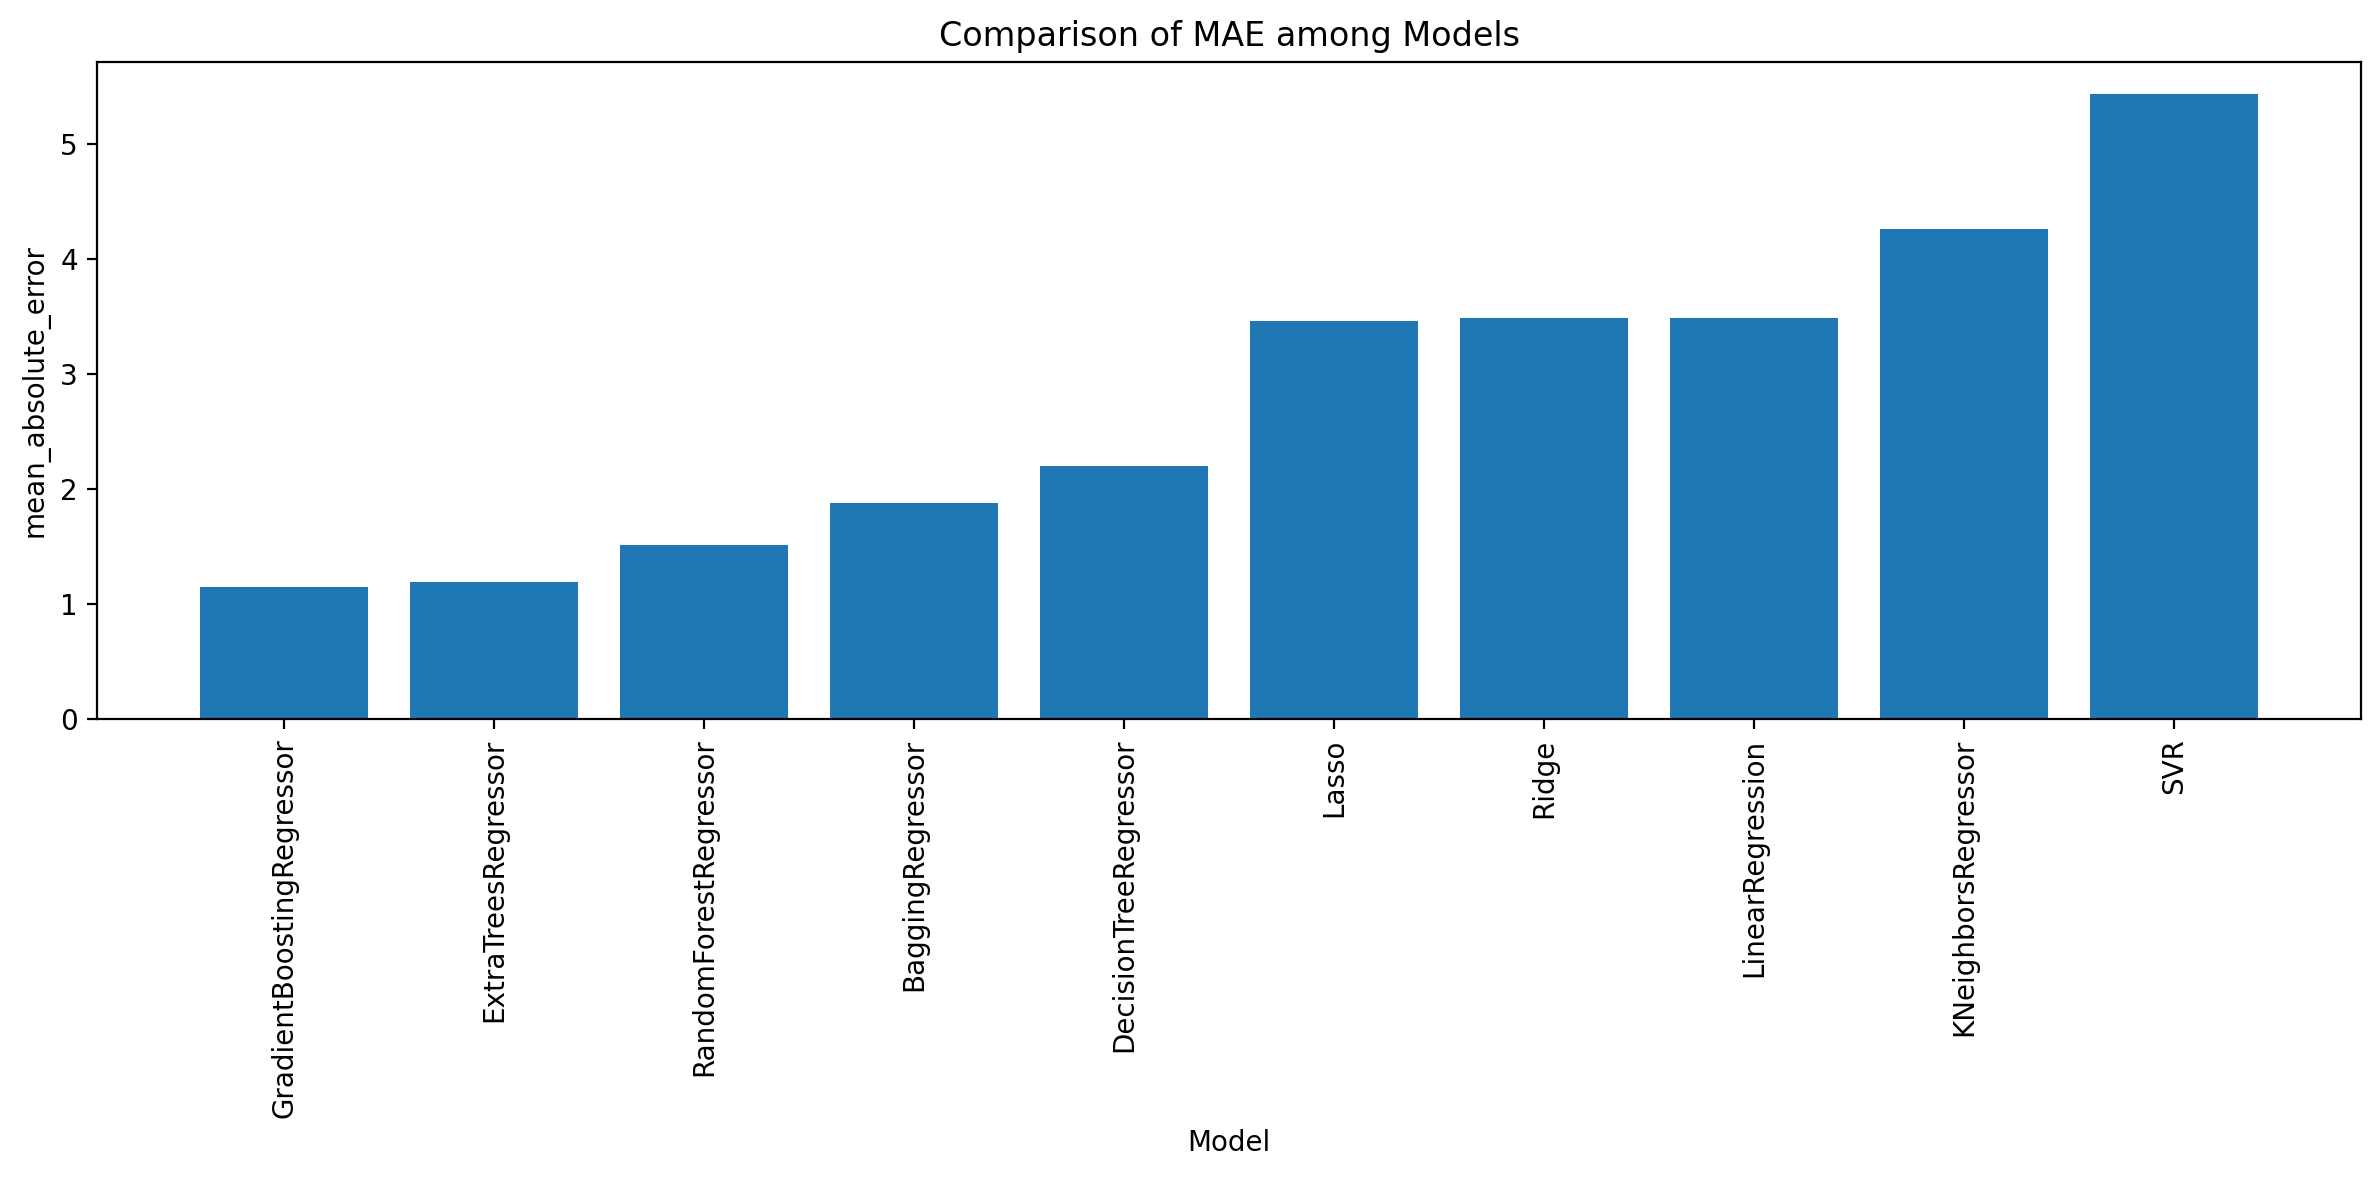

In [18]:
# Function to plot and compare the different model perfs
def plot_comparison(data, x_label, y_label, title):
    plt.figure(figsize=(12, 6))
    plt.bar(data['Model Name'], data[y_label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# root_mean_squared_error
plot_comparison(winners, 'Model', 'root_mean_squared_error', 'Comparison of Root Mean Squared Error among Models')
# r2_score
plot_comparison(winners, 'Model', 'r2_score', 'Comparison of R2 Score among Models')
# mean_absolute_error
plot_comparison(winners, 'Model', 'mean_absolute_error', 'Comparison of MAE among Models')

In [19]:
# Top 3 performing Models
winner_models = [GradientBoostingRegressor(), 
                  ExtraTreesRegressor(), 
                  RandomForestRegressor()]

> * After obtaining the results, we deduced the **`top three performing models`**. These models demonstrated **incredible performance** even **withou**t the need for **feature engineering** or **model tuning**. However, it's important to note that in real-world scenarios, achieving such **exceptional results right from the start** often raises suspicions of **potential issues**, such as **data leakage**.

> * To ensure the robustness of these models, we will compare their results using **`K-fold Cross Validation`**. This technique allows us to evaluate the models' performance on multiple subsets of the data, providing a more reliable estimation of their effectiveness. 

### <p style="text-align:left"><span style="color:green">Implementing `K-Fold Cross Validation`</span></p>

In [20]:
# Setting the number of folds
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the evaluation scores for each fold
mse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
medae_scores = []

# Optionally, initialize a list to store the predictions for each fold
fold_predictions = []

for model in winner_models:
    # Iterate over the splits
    for train_index, val_index in kf.split(x):
        x_train, x_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train your model using x_train and y_train
        model = model
        model.fit(x_train, y_train)

        # Evaluate your model using x_val and y_val
        y_pred = model.predict(x_val)

        mse_score = mean_squared_error(y_val, y_pred)
        mae_score = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        mape = mean_absolute_percentage_error(y_val, y_pred)
        medae = median_absolute_error(y_val, y_pred)

        mse_scores.append(mse_score)
        mae_scores.append(mae_score)
        r2_scores.append(r2)
        mape_scores.append(mape)
        medae_scores.append(medae)

        # Store the predictions for each fold if needed
        fold_predictions.append(y_pred)

    # Compute the average scores across all folds
    average_mse = np.mean(mse_scores)
    average_mae = np.mean(mae_scores)
    average_r2 = np.mean(r2_scores)
    average_mape = np.mean(mape_scores)
    average_medae = np.mean(medae_scores)

    # Print the average scores
    print (f"\n >> Model Name: {type(model).__name__}")
    print("Average MSE:", average_mse)
    print("Average MAE:", average_mae)
    print("Average R-squared:", average_r2)
    print("Average MAPE:", average_mape)
    print("Average MedAE:", average_medae)
    print ()


 >> Model Name: GradientBoostingRegressor
Average MSE: 5.098470032960871
Average MAE: 1.1742371201729649
Average R-squared: 0.984325785505287
Average MAPE: 416062118299382.9
Average MedAE: 0.809198398101983


 >> Model Name: ExtraTreesRegressor
Average MSE: 7.752265381040436
Average MAE: 1.2530652600864827
Average R-squared: 0.9764946510205339
Average MAPE: 526766567377397.3
Average MedAE: 0.7710141990509907


 >> Model Name: RandomForestRegressor
Average MSE: 7.680816289656957
Average MAE: 1.355438873390988
Average R-squared: 0.9764438214850768
Average MAPE: 442759761087398.8
Average MedAE: 0.8301994660339967



> * Based on the results obtained from the **5-fold cross-validation**, all models have demonstrated good performance. However, we i decided to select the **`GradientBoostingRegressor`** as the winning model for further analysis. This model exhibited the **best performance among the three, as indicated by the evaluation metrics**.

> * To proceed with the analysis, we will train the **selected model** using all the data from **period_0**. By utilizing a larger dataset, i aim to enhance the model's ability to generalize and make accurate predictions. 

### <p style="text-align:left"><span style="color:green">Training a model on `period_0 data` ( Obj 1 )</span></p>

In [21]:
# Splitting the dataset into features (x) and target variable (y)
x = quarter_0.drop(target, axis=1)  # Extracting features by excluding the target variable
y = quarter_0[target]  # Target variable

# Instantiating the winner model (GradientBoostingRegressor) and fitting it to the data
winner_model = GradientBoostingRegressor()
winner_model.fit(x, y)
winner_model

GradientBoostingRegressor()

> * Now that our model is trained on **period_0**, it has successfully passed the cross-validation test and achieved **impressive scores**. I would like to present this plot created using Plotly (the best data visualization tool in Python XD). 

> * I will now evaluate the model's performance on **x_test** to obtain the predicted values **y_pred** and compare them with **y_test**.

In [22]:
# Predecting x_test us
y_pred = winner_model.predict(x_test)

# Storing the results in a new DataFrame
result = pd.DataFrame({'actual': y_test, 'pred': y_pred})
result.head(3)

,actual,pred
521,28.28,28.196181
737,24.40,25.369083
740,51.62,50.355344


> * It is expected that the **predicted values** will closely **match** the **actual values**, given that the model has **already been trained** on and **performed well** on period_0 data. 😉

> ⚠️ Please note that the **figures generated using Plotly may not render correctly on GitHub due to their dynamic nature**. 
 
> 💡 To ensure proper visualization, I have saved all the figures in the `results/` directory. You can easily download the HTML figures for viewing. Alternatively, you can run the notebook locally by referring to the detailed instructions provided in the **Read.me** file on my GitHub repository.

> Additionally, I have hosted the figures using [HTML Github Preview](https://htmlpreview.github.io/). To explore the figures , simply click on the **`Explore Figure` Button**.

In [23]:
# Actual Vs. Predicted plot
fig = px.scatter(result, x='actual', y='pred', trendline='ols', color='actual', 
                 title='Actual Vs. Predicted', 
                 labels={'actual': 'Actual', 'pred': 'Predicted'})

fig.add_trace(go.Scatter(x=result['actual'], y=result['actual'], mode='lines', 
                         name='Perfect fit', line=dict(color='green', width=2, dash='dash')))

# Change the position of the legend to the bottom
fig.update_layout(legend=dict(yanchor="bottom", y=0.89, xanchor="left", x=0.01))

fig.update_layout(
    title='Actual Vs. Predicted values', 
    title_x=0.6,  # Center the title
    title_y=0.87,  
    
    annotations=[
        {
            "x": 0.01,
            "y": 0.87 - i*0.06,
            "text": f"{label}: {value}",
            "showarrow": False,
            "font": {"size": 12},
            "xref": "paper",
            "yref": "paper",
        }
        for i, (label, value) in enumerate(
            [
                ("RMSE", winner_RMSE),
                ("MSE", winner_MSE),
                ("MAE", winner_MAE),
                ("R2", winner_R2),
            ]
        )
    ],
)

fig.show()

[Explore Figure](https://htmlpreview.github.io/?https://github.com/labrijisaad/data-science-technical-test/blob/main/results/Actual%20vs.%20Predicted%20Trendline%20Plot%20-%20Train%20Data%20(period_0).html)

## <p style="text-align:center"><span style="color:red">Test `Winner Model` on `period_1/3 data` ( Obj 1 bis)</span></p>

In [24]:
# Reading the datasets for periods 1, 2, and 3
quarter_1 = periods[1]
quarter_2 = periods[2]
quarter_3 = periods[3]

# Concatenating the data for periods 1 to 3
later_quarters = pd.concat([quarter_1, quarter_2, quarter_3])
print(f"{later_quarters.shape =}") # We expect a total number of rows 3000
later_quarters.head(3)

later_quarters.shape =(3000, 10)


,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,0,2,6,0.12,Beauty & Personal Care,26.266632,0,2,14.34
1,24,1,4,6,0.80,Home & Kitchen,29.423088,0,0,21.36
2,26,3,3,8,0.12,"Clothing,Shoes & Jewelry",348.042881,2,2,67.88


In [25]:
for col in later_quarters.columns:
    if later_quarters[col].dtype=='object':
        later_quarters[col] = le.fit_transform(later_quarters[col])
        
later_quarters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3000 non-null   int64  
 1   Seniority            3000 non-null   int64  
 2   Orders               3000 non-null   int64  
 3   Items                3000 non-null   int64  
 4   AverageDiscount      3000 non-null   float64
 5   TopCategory          3000 non-null   int64  
 6   BrowsingTime         3000 non-null   float64
 7   EmailsOpened         3000 non-null   int64  
 8   SupportInteractions  3000 non-null   int64  
 9   TotalCart            3000 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 257.8 KB


In [26]:
# Splitting the dataset into features (x) and target variable (y)
x_later_quarters = later_quarters.drop(target, axis=1)  # Extracting features by excluding the target variable
y_later_quarters = later_quarters[target]  # Target variable

In [27]:
# Predecting x_test us
y_pred_later_quarters = winner_model.predict(x_later_quarters)

# Storing the results in a new DataFrame
result = pd.DataFrame({'actual': y_later_quarters, 'pred': y_pred_later_quarters})

result.head(3)

,actual,pred
0,14.34,22.861442
1,21.36,29.509785
2,67.88,73.351529


> Judging from the `actual Vs. pred` head values alone, it is clear that the **model's performance on the later quarters' data is lacking**.

### <p style="text-align:left"><span style="color:green">`Actual Vs. Predicted values Plot` ( Obj 1 bis)</span></p>

In [28]:
y_actual = result.actual.values.tolist()
y_pred = result.pred.values.tolist()

# Recalculate the Performance Metrics of the new model
RMSE = mean_squared_error(y_actual, y_pred, squared=False)
MSE = mean_squared_error(y_actual, y_pred)
MAE = mean_absolute_error(y_actual, y_pred)
R2 = r2_score(y_actual, y_pred)

In [29]:
# Actual Vs. Predicted plot
fig = px.scatter(result, x='actual', y='pred', trendline='ols', color='actual', 
                 title='Actual Vs. Predicted ( Period 1,2 and 3 )', 
                 labels={'actual': 'Actual', 'pred': 'Predicted'})

fig.add_trace(go.Scatter(x=result['actual'], y=result['actual'], mode='lines', 
                         name='Perfect fit', line=dict(color='green', width=2, dash='dash')))

# Change the position of the legend to the bottom
fig.update_layout(legend=dict(yanchor="bottom", y=0.89, xanchor="left", x=0.01))

fig.update_layout(
    title='Actual Vs. Predicted values', 
    title_x=0.6,  # Center the title
    title_y=0.87,
    annotations=[
        {
            "x": 0.01,
            "y": 0.87 - i*0.06,
            "text": f"{label}: {value}",
            "showarrow": False,
            "font": {"size": 12},
            "xref": "paper",
            "yref": "paper",
        }
        for i, (label, value) in enumerate(
            [
                ("RMSE", RMSE),
                ("MSE", MSE),
                ("MAE", MAE),
                ("R2",R2),
            ]
        )
    ],
)

fig.show()

[Explore Figure](https://htmlpreview.github.io/?https://github.com/labrijisaad/data-science-technical-test/blob/main/results/Actual%20vs.%20Predicted%20Trendline%20Plot%20-%20New%20Data%20(period_1_2_3).html)

### <p style="text-align:left"><span style="color:green">`Distribution of Predicted Values vs. Actual Values` ( Obj 1 bis)</span></p>

In [30]:
y_actual = result.actual.values.tolist()
y_pred = result.pred.values.tolist()

# Create a histogram for 'y_pred' and 'y_actual'
fig = go.Figure()
fig.add_trace(go.Histogram(x=y_pred, name='Actual_1_2_3', opacity=0.5))
fig.add_trace(go.Histogram(x=y_actual, name='Predicted_1_2_3', opacity=0.5))

# Configure layout and annotations
fig.update_layout(
    title='Distribution of Predicted Values vs. Actual Values ( Period 1,2 and 3 )',
    xaxis_title='Values',
    yaxis_title='Frequency',
    barmode='overlay',
    showlegend=True,
    legend=dict(x=0.7, y=0.95),
    
    annotations=[
        {
            "x": 0.05,
            "y": 0.97 - i*0.06,
            "text": f"{label}: {value}",
            "showarrow": False,
            "font": {"size": 12},
            "xref": "paper",
            "yref": "paper",
        }
        for i, (label, value) in enumerate(
            [
                ("RMSE", RMSE),
                ("MSE", MSE),
                ("MAE", MAE),
                ("R2",R2),
            ]
        )
    ],
    
)

# Show the plot
fig.show()

[Explore Figure](https://htmlpreview.github.io/?https://github.com/labrijisaad/data-science-technical-test/blob/main/results/Distribution%20of%20Predicted%20Values%20vs.%20Actual%20Values%20(%20period_1_2_3%20).html)

#### <p style="text-align:left"><span style="color:blue">`Distribution` of Predicted Values vs. Actual Values ( `Period 1` )</span></p>

In [31]:
# Period_1 data
y_actual_1 = y_actual[: 1000]
y_pred_1 = y_pred[: 1000]


# Recalculate the Performance Metrics of the new model
RMSE = mean_squared_error(y_actual_1, y_pred_1, squared=False)
MSE = mean_squared_error(y_actual_1, y_pred_1)
MAE = mean_absolute_error(y_actual_1, y_pred_1)
R2 = r2_score(y_actual_1, y_pred_1)


# Create a histogram for 'y_pred_1' and 'y_actual_1'
fig = go.Figure()
fig.add_trace(go.Histogram(x=y_actual_1, name='Actual_1', opacity=0.5))
fig.add_trace(go.Histogram(x=y_pred_1, name='Predicted_1', opacity=0.5))

# Configure layout and annotations
fig.update_layout(
    title='Distribution of Predicted Values vs. Actual Values ( Period 1 )',
    xaxis_title='Values',
    yaxis_title='Frequency',
    barmode='overlay',
    showlegend=True,
    legend=dict(x=0.7, y=0.95),
    
    annotations=[
        {
            "x": 0.5,
            "y": 0.97 - i*0.06,
            "text": f"{label}: {value}",
            "showarrow": False,
            "font": {"size": 12},
            "xref": "paper",
            "yref": "paper",
        }
        for i, (label, value) in enumerate(
            [
                ("RMSE", RMSE),
                ("MSE", MSE),
                ("MAE", MAE),
                ("R2",R2),
            ]
        )
    ],
    
)

# Show the plot
fig.show()

[Explore Figure](https://htmlpreview.github.io/?https://github.com/labrijisaad/data-science-technical-test/blob/main/results/Distribution%20of%20Predicted%20Values%20vs.%20Actual%20Values%20(%20period_1%20).html)

#### <p style="text-align:left"><span style="color:blue">`Distribution` of Predicted Values vs. Actual Values ( `Period 2` )</span></p>

In [32]:
# Period_2 data
y_actual_2 = y_actual[1000: 2000]
y_pred_2 = y_pred[1000: 2000]


# Recalculate the Performance Metrics of the new model
RMSE = mean_squared_error(y_actual_2, y_pred_2, squared=False)
MSE = mean_squared_error(y_actual_2, y_pred_2)
MAE = mean_absolute_error(y_actual_2, y_pred_2)
R2 = r2_score(y_actual_2, y_pred_2)


# Create a histogram for 'y_pred_2' and 'y_actual_2'
fig = go.Figure()
fig.add_trace(go.Histogram(x=y_actual_2, name='Actual_2', opacity=0.5))
fig.add_trace(go.Histogram(x=y_pred_2, name='Predicted_2', opacity=0.5))

# Configure layout and annotations
fig.update_layout(
    title='Distribution of Predicted Values vs. Actual Values ( Period 2 )',
    xaxis_title='Values',
    yaxis_title='Frequency',
    barmode='overlay',
    showlegend=True,
    legend=dict(x=0.7, y=0.95),
    
    annotations=[
        {
            "x": 0.5,
            "y": 0.97 - i*0.06,
            "text": f"{label}: {value}",
            "showarrow": False,
            "font": {"size": 12},
            "xref": "paper",
            "yref": "paper",
        }
        for i, (label, value) in enumerate(
            [
                ("RMSE", RMSE),
                ("MSE", MSE),
                ("MAE", MAE),
                ("R2",R2),
            ]
        )
    ],
    
)

# Show the plot
fig.show()

[Explore Figure](https://htmlpreview.github.io/?https://github.com/labrijisaad/data-science-technical-test/blob/main/results/Distribution%20of%20Predicted%20Values%20vs.%20Actual%20Values%20(%20period_2%20).html)

#### <p style="text-align:left"><span style="color:blue">`Distribution` of Predicted Values vs. Actual Values ( `Period 3` )</span></p>

In [33]:
# Period_3 data
y_actual_3 = y_actual[2000:]
y_pred_3 = y_pred[2000:]

# Recalculate the Performance Metrics of the new model
RMSE = mean_squared_error(y_actual_3, y_pred_3, squared=False)
MSE = mean_squared_error(y_actual_3, y_pred_3)
MAE = mean_absolute_error(y_actual_3, y_pred_3)
R2 = r2_score(y_actual_3, y_pred_3)


# Create a histogram for 'y_pred_3' and 'y_actual_3'
fig = go.Figure()
fig.add_trace(go.Histogram(x=y_actual_3, name='Actual_3', opacity=0.5))
fig.add_trace(go.Histogram(x=y_pred_3, name='Predicted_3', opacity=0.5))

# Configure layout and annotations
fig.update_layout(
    title='Distribution of Predicted Values vs. Actual Values ( Period 3 )',
    xaxis_title='Values',
    yaxis_title='Frequency',
    barmode='overlay',
    showlegend=True,
    legend=dict(x=0.7, y=0.95),
    
    annotations=[
        {
            "x": 0.5,
            "y": 0.97 - i*0.06,
            "text": f"{label}: {value}",
            "showarrow": False,
            "font": {"size": 12},
            "xref": "paper",
            "yref": "paper",
        }
        for i, (label, value) in enumerate(
            [
                ("RMSE", RMSE),
                ("MSE", MSE),
                ("MAE", MAE),
                ("R2",R2),
            ]
        )
    ],
    
)

# Show the plot
fig.show()

[Explore Figure](https://github.com/labrijisaad/data-science-technical-test/blob/main/results/Distribution%20of%20Predicted%20Values%20vs.%20Actual%20Values%20(%20period_3%20).html)

* **`Question`** : **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

> * On this new data, it is evident that the **model does not perform well**. 

> * The performance metrics have **degraded**, and the distribution of the predicted values versus the actual values is similar in terms of shape, but they do not overlap. 

> * Therefore, we can conclude that there is a clear **`performance degradation`**.

#
## <p style="text-align:center"><span style="color:red">Measurement of the `drift` of Categorical Variables. ( Obj 2 )</span></p>

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

### <p style="text-align:left"><span style="color:green">`Kullback-Leibler Divergence` ( Obj 2 )</span></p>

In [34]:
def KLDivergence(P, Q):
    """
    Calcule la divergence de Kullback-Leibler entre les distributions P et Q.

    Args:
        P : Distribution de probabilités P.
        Q : Distribution de probabilités Q.

    Returns:
        float: Divergence de Kullback-Leibler entre P et Q.
    """
    P = np.asarray(P)
    Q = np.asarray(Q)

    # Vérification des dimensions des distributions
    assert P.shape == Q.shape, "Les distributions P et Q doivent avoir la même dimension."

    # Vérification que les probabilités sont valides
    assert np.all(P >= 0) and np.all(P <= 1), "Les probabilités de P doivent être comprises entre 0 et 1."
    assert np.all(Q >= 0) and np.all(Q <= 1), "Les probabilités de Q doivent être comprises entre 0 et 1."

    # Vérification que les probabilités de P ne sont pas nulles
    assert np.all(P > 0), "Les probabilités de P ne peuvent pas être nulles."

    # Calcul de la divergence de Kullback-Leibler
    divergence = np.sum(P * np.log(P / Q))

    return divergence

### <p style="text-align:left"><span style="color:green">`Jensen-Shannon Divergence` ( Obj 2 )</span></p>

In [35]:
def JSDivergence(P, Q):
    """
    Calcule la divergence Jensen-Shannon entre les distributions P et Q.
    
    Args:
        P : Distribution de probabilités P.
        Q : Distribution de probabilités Q.
        
    Returns:
        float: Divergence Jensen-Shannon entre P et Q.
    """
    P = np.asarray(P)
    Q = np.asarray(Q)
    
    # Vérification des dimensions des distributions
    assert P.shape == Q.shape, "Les distributions P et Q doivent avoir la même dimension."
    
    # Vérification que les probabilités sont valides
    assert np.all(P >= 0) and np.all(P <= 1), "Les probabilités de P doivent être comprises entre 0 et 1."
    assert np.all(Q >= 0) and np.all(Q <= 1), "Les probabilités de Q doivent être comprises entre 0 et 1."
    
    # Vérification que les probabilités de P ne sont pas nulles
    assert np.all(P > 0), "Les probabilités de P ne peuvent pas être nulles."
    
    # Calcul de la distribution moyenne
    M = 0.5 * (P + Q)
    
    # Calcul des divergences de Kullback-Leibler
    kl_divergence_p = KLDivergence(P, M)
    kl_divergence_q = KLDivergence(Q, M)
    
    # Calcul de la divergence Jensen-Shannon
    js_divergence = 0.5 * (kl_divergence_p + kl_divergence_q)
    
    return js_divergence

### <p style="text-align:left"><span style="color:green">Exemple : Testing `JSDivergence` & `KLDivergence` ( Obj 2 )</span></p>

In [36]:
# Define an example
P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

# Calculate the Divergence
JSDivergence_P_Q, KLDivergence_P_Q = JSDivergence(P, Q), KLDivergence(P, Q)

print(f'{JSDivergence_P_Q = }')
print(f'{KLDivergence_P_Q = }')

JSDivergence_P_Q = 0.006367198333995731
KLDivergence_P_Q = 0.02526715392157057


#
## <p style="text-align:center"><span style="color:red">Measurement of the `drift` of Quantitative Variables. ( Obj 2 )</span></p>

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

### <p style="text-align:left"><span style="color:green">`Wasserstein Distance` ( Obj 2 )</span></p>

In [37]:
def WassersteinDistance(X, Y, p):
    """
    Calculate the Wasserstein distance of order p between two sets of quantitative data.

    Parameters:
    X : First set of data samples.
    Y : Second set of data samples.
    p : Order of the Wasserstein distance.

    Returns:
    float: Wasserstein distance of order p between X and Y.
    """

    sorted_X = np.sort(X)
    sorted_Y = np.sort(Y)
    return np.power(np.sum(np.abs(sorted_X - sorted_Y) ** p), 1 / p)

### <p style="text-align:left"><span style="color:green">Exemple : Testing `WassersteinDistance` ( Obj 2 )</span></p>

In [38]:
# Define an example
X = np.random.beta(2, 6, 100)
Y = np.random.beta(3, 6, 100)

# Calculate the Distance
WassersteinDistance_X_Y = WassersteinDistance(X, Y, 2)

print(f'{WassersteinDistance_X_Y = }')

WassersteinDistance_X_Y = 0.6798580837684506


#
## <p style="text-align:center"><span style="color:red">Study of `Model Drift` ( Obj 3 )</span></p>

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.